## うどんらしさ　ラーメンらしさ棒グラフの描画

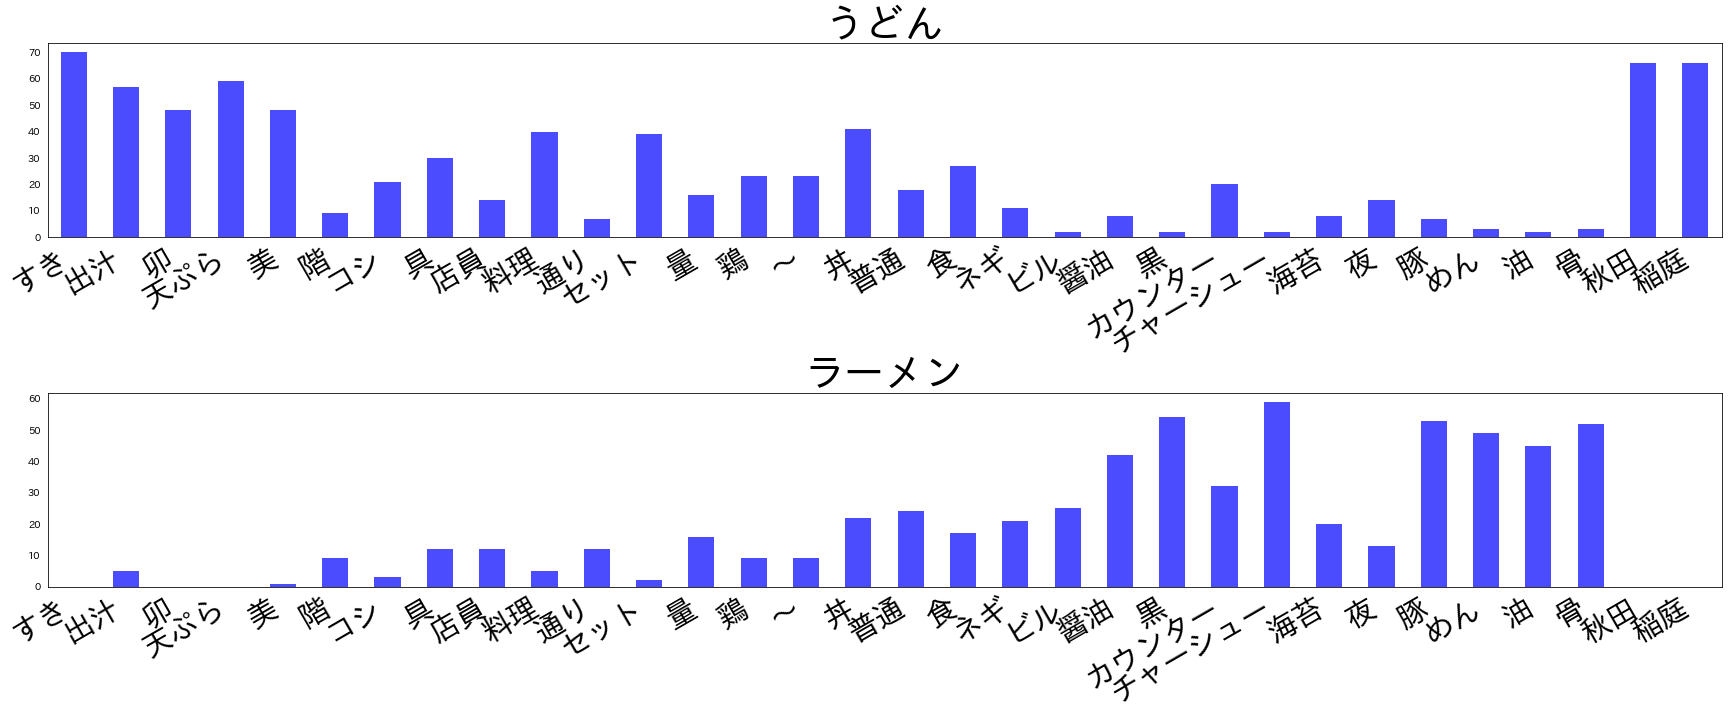

In [2]:
%run createSave_dict_corpus.py
import numpy as np
import gensim
from gensim import corpora, models,matutils
from collections import defaultdict
from operator import itemgetter
import pandas as pd
import codecs
import japanize_matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 30,10

def making_dataset(csv_name,dict_name,corpus_name):

    csv_input = pd.read_csv(csv_name, encoding='ms932', sep=',',skiprows=0)    
    dict_word=[]    
    dictionary = gensim.corpora.Dictionary.load_from_text(dict_name)
    for k, v in sorted(dictionary.items()):
        
        dict_word.append(v)

    feature_matrix = [list(matutils.corpus2dense([corpus_unit], num_terms=len(dict_word)).T[0]) for corpus_unit in corpus]
    zero_padd_corpus_df = pd.DataFrame(feature_matrix, columns=dict_word)
    dataset_df = pd.concat([csv_input['label'], zero_padd_corpus_df], axis=1)    
    
    return dataset_df

    
if __name__ == '__main__':
    filter_category=[]
    dataset_df=making_dataset('tabelog_words.csv','tabelog.dict','tabelog_corpus.mm')
    grouped_df = dataset_df.groupby('label').sum()
    fig = plt.figure()
    
    for i,(label,g) in enumerate(grouped_df.iterrows()):        
        
        ax = fig.add_subplot(2, 1, i+1)
        ax.set_title(label,fontsize=40)
        g.plot(kind='bar', ax=ax, color='b', alpha=0.7)
        ax.tick_params(left=False,bottom=False)
        ax.set_xticklabels(g.index, rotation=30, ha='right',fontsize =30)
    plt.subplots_adjust(wspace=0.4, hspace=0.8)
    plt.show()